# Задание

### Основная часть

* Попробовать построить графики из тех, что были на уроке по Seaborn и Matplotlib
* Важно чтобы у каждого из графиков был как минимум один в комментариях или markdown

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
from pylab import rcParams

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

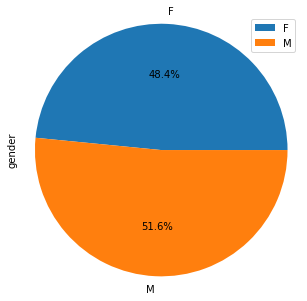

In [4]:
# 1. Круговая диаграмма.
# Соотношение полов в таблице.

gender = df.groupby('gender').agg({'gender':'count'})
gender.plot.pie(subplots=True, figsize=(5, 5), autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# Вывод: в таблице представлены данные примерно в равном соотношении между мужчинами и женщинами

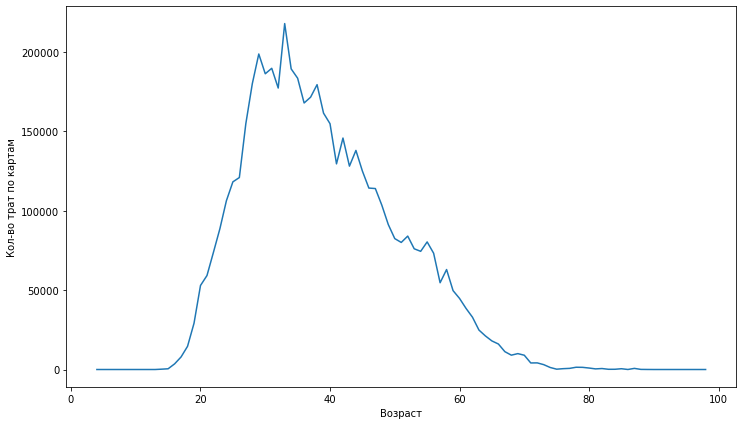

In [9]:
# 2. Линейный график.
# Количество трат по картам в зависимости от возраста

spendings = df[['age', 'dc_trx_cnt']].groupby(['age']).sum()
rcParams['figure.figsize'] = 12, 7
plt.plot(spendings.dc_trx_cnt)
plt.xlabel('Возраст')
plt.ylabel('Кол-во трат по картам')
plt.show()

# Вывод: до 25-35 лет количество трат по картам стретиметльно растет, однако после 35 лет тренд показывает 
# снижение количества трат.

Text(0, 0.5, 'income')

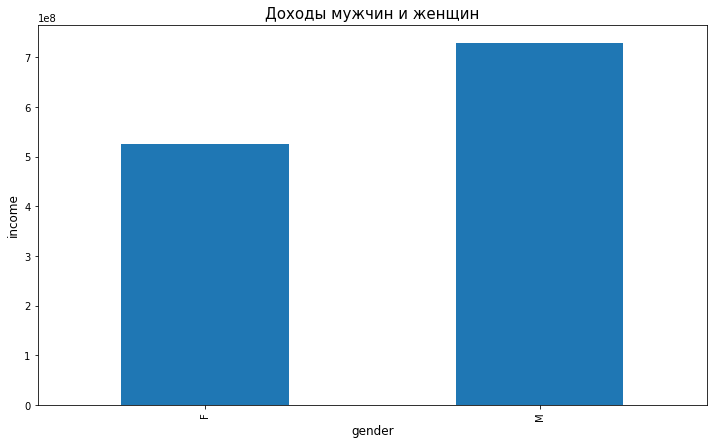

In [40]:
# 3. Столбчатая диаграмма
# Доходы клиентов по половому признаку

income_by_gender = df.groupby('gender')['income'].sum()
income_by_gender.plot.bar()
plt.title('Доходы мужчин и женщин', fontsize=15)
plt.xlabel('gender', fontsize=12)
plt.ylabel('income', fontsize=12)

# Вывод: доход мужчин превышает доход женщин

In [134]:
# проанализируем доход мужчин и женщин в городах 

df.groupby(['city_type', 'gender'])['income'].agg(['sum', 'count'])

# Вывод: доход мужчин превышает доход женщин, при этом доход в городах до 100 тысяч жителей размер доходов гораздо выше, 
# так как в датасете наибольшее количество мужчин и женщин представлено именно из этого типа городов.

sum  count
city_type gender                     
100-500   F      120,855,843.4   5291
          М      135,177,644.3   5369
1M+       F       72,356,103.9   4063
          М       83,239,536.7   3784
500-1000  F       73,088,772.7   3297
          М      101,839,987.3   3629
<100      F      152,811,153.7   7048
          М      262,706,531.2   8163
Mega      F      107,552,156.7   4175
          М      146,499,247.8   4458

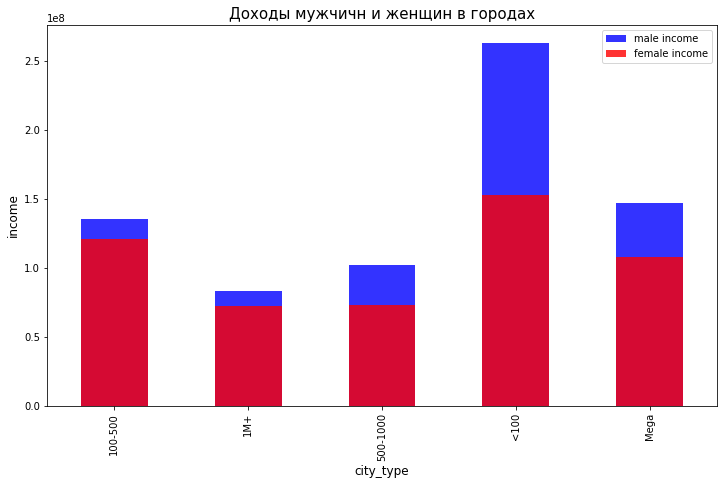

In [135]:
# Отобразим данные с использованием столбчатой диаграммы

male = df[df['gender'] == 'М'].groupby('city_type')['income'].sum()
female = df[df['gender'] == 'F'].groupby('city_type')['income'].sum()

male.plot.bar(x="city_type", y="income", color='blue', alpha=0.8, label='male income')
female.plot.bar(x="city_type", y="income", color='red', alpha=0.8, label='female income')
plt.title('Доходы мужчичн и женщин в городах', fontsize=15)
plt.xlabel('city_type', fontsize=12)
plt.ylabel('income', fontsize=12)
plt.legend()

# Вывод: доходы мужчин превышают доходы женщин в разного типа городах. Мужчинам платят больше.

In [89]:
# 4. Диаграмма рассеяния
# Проверим, связаны ли между собой показатели по счетам клиентов 'casa_balance_0m' и доход от клиента без OPEX 'nbi'

df['casa_balance_0m'].corr(df['nbi'])
# коэффициент корреляции равен 0,77, можно интерпретировать это как средняя корреляция.

0.7698993542872464

Text(0, 0.5, 'nbi')

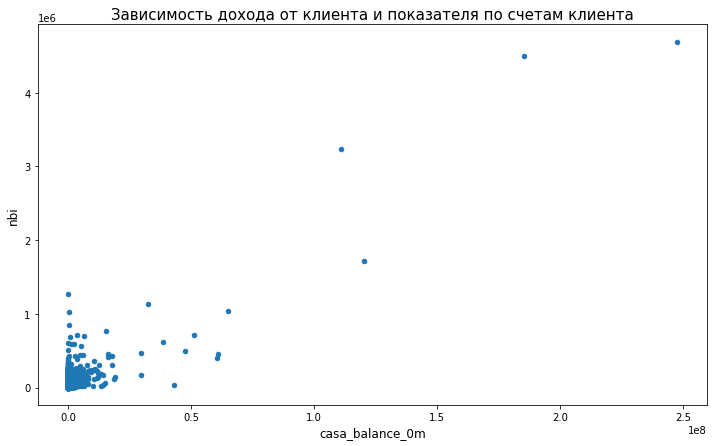

In [95]:
# Построим диаграмму рассеяния

df.plot(x="casa_balance_0m", y="nbi", kind="scatter")
plt.title('Зависимость дохода от клиента и показателя по счетам клиента', fontsize=15)
plt.xlabel('casa_balance_0m', fontsize=12)
plt.ylabel('nbi', fontsize=12)

# Вывод: На графике видно, что имеет место слабая положительная корреляция. Это значит, что есть некоторая зависимость
# между балансом на счетах клиентов и доходом от клиента без OPEX